# QSO Cl's

In [1]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)

sys.path.insert(1, '/home/jaimerz/PhD/xCell')

from xcell.mappers import MappereBOSSQSO
from xcell.mappers import MapperBOSSCMASS
from xcell.mappers import MapperBOSSLOWZ
from xcell.mappers import utils
from astropy.io import fits
from astropy.table import Table
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp
import numpy as np

In [2]:
# Initialize binning scheme with 20 ells per bandpower
nside =  512
nside_mask = 512
#bands = nmt.NmtBin.from_nside_linear(nside, 20)
#ell_arr = bands.get_effective_ells()

In [3]:
ells = [0, 30, 60, 90, 120, 150, 180, 210, 240, 272, 309, 351, 398, 452, 513, 582, 661, 750, 852, 967, 1098, 1247, 1416, 1536] #1608, 1826, 2073, 2354, 2673, 3072]
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [4]:
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [5]:
data_path = '/home/jaimerz/PhD/xCell/data/'
QSO_NGC1_config = {'data_catalogs':[data_path+'eBOSSQSO/eBOSS_QSO_clustering_data-NGC-vDR16.fits'], 
          'random_catalogs':[data_path+'eBOSSQSO/eBOSS_QSO_clustering_random-NGC-vDR16.fits'],
          'z_edges':[0, 1.5],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_NGC_1'}

QSO_NGC2_config = {'data_catalogs':[data_path+'eBOSSQSO/eBOSS_QSO_clustering_data-NGC-vDR16.fits'], 
          'random_catalogs':[data_path+'eBOSSQSO/eBOSS_QSO_clustering_random-NGC-vDR16.fits'],
          'z_edges':[1.5, 3],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_NGC_2'}

CMASS_NGC_config = {'data_catalogs':[data_path+'BOSSCMASS/galaxy_DR12v5_CMASS_North.fits'], 
          'random_catalogs':[data_path+'BOSSCMASS/random1_DR12v5_CMASS_North.fits'],
          'mask_path':[data_path+'BOSSCMASS/mask_DR12v5_CMASS_North.fits'],
          'z_edges':[0.43, 0.75],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_CMASS_NGC'}

LOWZ_NGC_config = {'data_catalogs':[data_path+'BOSSLOWZ/galaxy_DR12v5_LOWZ_North.fits'], 
          'random_catalogs':[data_path+'BOSSLOWZ/random1_DR12v5_LOWZ_North.fits'],
          'mask_path':[data_path+'BOSSLOWZ/mask_DR12v5_LOWZ_North.fits'],
          'z_edges':[0.15, 0.43],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_LOWZ_NGC'}

In [6]:
QSO_1 = MappereBOSSQSO(QSO_NGC1_config)
QSO_2 = MappereBOSSQSO(QSO_NGC2_config)

In [7]:
CMASS = MapperBOSSCMASS(CMASS_NGC_config)
LOWZ = MapperBOSSLOWZ(LOWZ_NGC_config)

In [26]:
CMASS_gal_cat = CMASS.get_catalog(mod='data')
CMASS_rnd_cat = CMASS.get_catalog(mod='random')
CMASS_gal_w = CMASS._get_w(mod='data')
CMASS_rnd_w = CMASS._get_w(mod='random')

LOWZ_gal_cat = LOWZ.get_catalog(mod='data')
LOWZ_rnd_cat = LOWZ.get_catalog(mod='random')
LOWZ_gal_w = LOWZ._get_w(mod='data')
LOWZ_rnd_w = LOWZ._get_w(mod='random')
#randoms don't have W

In [9]:
#hp.read_map(data_path+'BOSSCMASS/mask_DR12v5_CMASS_North.fits')

In [10]:
CMASS_map = CMASS.get_signal_map()
LOWZ_map = LOWZ.get_signal_map()
QSO_1_map = QSO_1.get_signal_map()
QSO_2_map =QSO_1.get_signal_map()

/home/jaimerz/.local/lib/python3.8/site-packages/healpy/pixelfunc.py:475: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)


/home/jaimerz/.local/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/jaimerz/.local/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/jaimerz/.local/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a reg

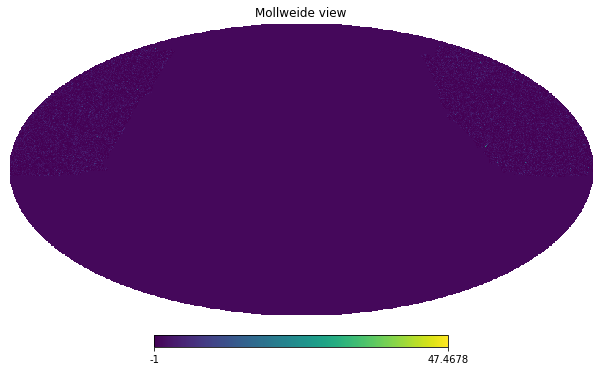

In [11]:
hp.visufunc.mollview(map=np.array(CMASS_map)[0])

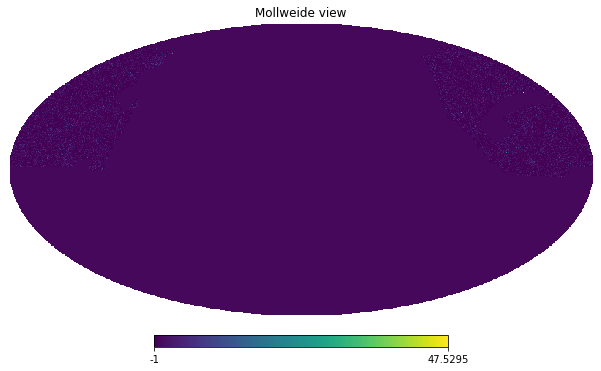

In [12]:
hp.visufunc.mollview(map=np.array(LOWZ_map)[0])

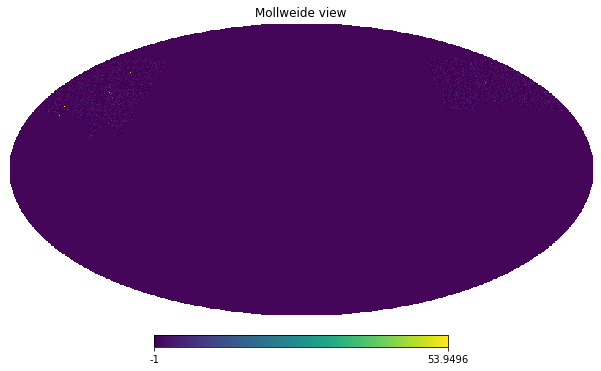

In [13]:
hp.visufunc.mollview(map=np.array(QSO_1_map)[0])

In [14]:
#Mask method has a bug

In [15]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.049, h=0.67, sigma8=0.81, n_s=0.96)
b_ngc = 2.37*np.ones(50) 
b_sgc = 2.32 *np.ones(50) 

In [16]:
QSO_1_nz = QSO_1.get_nz()
QSO_2_nz = QSO_2.get_nz()
CMASS_nz = CMASS.get_nz()
LOWZ_nz = LOWZ.get_nz()

QSO_1_z = QSO_1_nz[1]
QSO_1_dNdz = QSO_1_nz[0]
QSO_2_z = QSO_2_nz[1]
QSO_2_dNdz = QSO_2_nz[0]


CMASS_z = CMASS_nz[1]
CMASS_dNdz = CMASS_nz[0]
LOWZ_z = LOWZ_nz[1]
LOWZ_dNdz = LOWZ_nz[0]

#quasar1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z_1,dNdz_1), bias=(z_1,b_ngc))
#quasar2 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z_2,dNdz_2), bias=(z_2,b_ngc))
#CMB_shear = ccl.CMBLensingTracer(cosmo, 1100)

In [24]:
CMASS_dNdz

array([0.52      , 0.56      , 0.6       , 0.64      , 0.68      ,
       0.72      , 0.76      , 0.79999995, 0.84000003, 0.88      ,
       0.91999996, 0.96000004, 1.        , 1.04      , 1.0799999 ,
       1.12      , 1.16      , 1.2       , 1.24      , 1.28      ,
       1.3199999 , 1.36      , 1.4       , 1.44      , 1.48      ,
       1.52      , 1.56      , 1.6       , 1.64      , 1.6800001 ,
       1.72      , 1.76      , 1.8       , 1.84      , 1.88      ,
       1.9200001 , 1.96      , 2.        , 2.04      , 2.08      ,
       2.12      , 2.16      , 2.2       , 2.24      , 2.28      ,
       2.32      , 2.3600001 , 2.4       , 2.44      , 2.48      ],
      dtype=float32)

In [32]:
LOWZ_h, LOWZ_b = np.histogram(LOWZ_gal_cat['Z'], bins=100,
                                weights=LOWZ_gal_w) #, range=[0.5, 2.5])
CMASS_h, CMASS_b = np.histogram(CMASS_gal_cat['Z'], bins=100,
                                weights=CMASS_gal_w) #, range=[0.5, 2.5])

In [36]:
CMASS_b

array([0.43000084, 0.4332008 , 0.4364008 , 0.43960077, 0.44280076,
       0.44600073, 0.44920072, 0.45240068, 0.45560065, 0.45880064,
       0.4620006 , 0.4652006 , 0.46840057, 0.47160053, 0.47480053,
       0.4780005 , 0.4812005 , 0.48440045, 0.48760045, 0.4908004 ,
       0.49400038, 0.49720037, 0.50040036, 0.5036003 , 0.5068003 ,
       0.5100003 , 0.5132002 , 0.5164002 , 0.5196002 , 0.5228002 ,
       0.52600014, 0.52920014, 0.53240013, 0.53560007, 0.53880006,
       0.54200006, 0.54520005, 0.5484    , 0.5516    , 0.5548    ,
       0.5579999 , 0.5611999 , 0.5643999 , 0.5675999 , 0.5707998 ,
       0.5739998 , 0.5771998 , 0.58039975, 0.58359975, 0.58679974,
       0.5899997 , 0.5931997 , 0.59639966, 0.59959966, 0.6027996 ,
       0.6059996 , 0.6091996 , 0.6123995 , 0.6155995 , 0.6187995 ,
       0.6219995 , 0.62519944, 0.62839943, 0.6315994 , 0.63479936,
       0.63799936, 0.64119935, 0.64439934, 0.6475993 , 0.6507993 ,
       0.65399927, 0.6571992 , 0.6603992 , 0.6635992 , 0.66679

ValueError: x and y must have same first dimension, but have shapes (101,) and (100,)

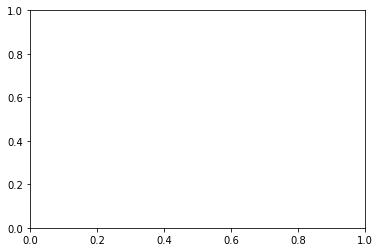

In [34]:
plt.plot(CMASS_b, CMASS_h, label='CMASS')
plt.plot(LOWZ_b, LOWZ_h, label='LOWZ')
plt.legend()
plt.show()

In [20]:
#ell = np.arange(2, 2000)
#theory_11 = ccl.angular_cl(cosmo, quasar1, quasar1, ell_arr) 
#theory_12 = ccl.angular_cl(cosmo, quasar1, quasar2, ell_arr) 
#theory_22 = ccl.angular_cl(cosmo, quasar2, quasar2, ell_arr) 

In [21]:
def compute_cl(f_a, f_b, wsp):
    # Compute the power spectrum (a la anafast) of the masked fields
    # Note that we only use n_iter=0 here to speed up the computation,
    # but the default value of 3 is recommended in general.
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    # Decouple power spectrum into bandpowers inverting the coupling matrix
    #cl_decoupled = wsp.decouple_cell(cl_coupled) #removed bias here

    return cl_coupled

In [22]:
QSO_f_1 =  QSO_1.get_nmt_field()
QSO_f_2 =  QSO_2.get_nmt_field()

/home/jaimerz/.local/lib/python3.8/site-packages/healpy/pixelfunc.py:475: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)


In [23]:
CMASS_f_1 =  CMASS_1.get_nmt_field()
CMASS_f_2 =  CMASS_2.get_nmt_field()

NameError: name 'CMASS_1' is not defined

In [ ]:
LOWZ_f_1 =  LOWZ_1.get_nmt_field()
LOWZ_f_2 =  LOWZ_2.get_nmt_field()

In [ ]:
sgdgdas

In [ ]:
w_11 = nmt.NmtWorkspace()
w_11.compute_coupling_matrix(f_1, f_1, bands)

w_22 = nmt.NmtWorkspace()
w_22.compute_coupling_matrix(f_2, f_2, bands)

In [ ]:
cl_c_11 = nmt.compute_coupled_cell(f_1, f_1)
cl_c_22 = nmt.compute_coupled_cell(f_2, f_2)

In [ ]:
cl_11 = w_11.decouple_cell(cl_c_11)
cl_22 = w_22.decouple_cell(cl_c_22)

In [ ]:
nl_c_11 = maps_1.get_nl_coupled() 
nl_c_22 = maps_2.get_nl_coupled() 

In [ ]:
nl_11 = w_11.decouple_cell(nl_c_11)
nl_22 = w_22.decouple_cell(nl_c_22)

In [ ]:
np.savez('512_eBOSSQSO_NGC+SGC_11', cl_coupled=cl_c_11, nl_decoupled=nl_11, nl_coupled=nl_c_11, cl_decoupled=cl_11)
np.savez('512_eBOSSQSO_NGC+SGC_22', cl_coupled=cl_c_22, nl_decoupled=nl_22, nl_coupled=nl_c_22, cl_decoupled=cl_22)

In [ ]:
translate = {
    'NGC': 'N',
    'SGC': 'S',
    '0': 'l',
    '1': 'h'   
}

In [ ]:
def load_david_cl(cup, a):
    cup = translate[cup]
    a = translate[a]
    return np.load('/home/zcapjru/PhD/Data/David_eBOSS/cls_{}{}_ns4096.npz'.format(cup, a))
def load_jaime_cl(cup, a):
    return np.loadtxt('/home/zcapjru/PhD/Cls/eBOSSQSO/4096/4096_{}_cl_{}{}.txt'.format(cup, a, a))
def load_jaime_nl(cup, a):
    return np.loadtxt('/home/zcapjru/PhD/Cls/eBOSSQSO/4096/4096_{}_nl_{}{}.txt'.format(cup, a, a))

In [ ]:
NGC_nl_11[0]

In [ ]:
plt.plot( NGC_nl_11[0], 'o-', label='cl')
plt.plot(load_david_cl('NGC', '1')['nl_coupled'][0], 'r--', label='david cl')
#plt.loglog()
plt.title('Quasars density angular NGC 22')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
cups = ['NGC', 'SGC']
for cup in cups:
    for i in range(2):
            david_ii = load_david_cl(cup,str(i))['cl'][0] - load_david_cl(cup,str(i))['nl'][0]
            jaime_ii = load_jaime_cl(cup,i)
            jaime_ii = jaime_ii - load_jaime_nl(cup,i)
            diff = abs(david_ii - jaime_ii)
            print('for {}_{}{} the max error is {}'.format(cup, i , i, max(diff)))

In [ ]:
load_david_cl('NGC', '1')['nl_coupled'][0]
#(ells > 2000) & (ells < 8000)

In [ ]:
plt.plot( load_jaime_nl('SGC', 0) , 'bs', label='Jaime nl')
plt.plot( load_jaime_cl('SGC', 0) , 'yo', label='Jaime Cl')
#plt.semilogx()
plt.title('Comp')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.ylim([9e-6, 1.05e-5])
plt.show()

In [ ]:
plt.plot( load_jaime_nl('SGC', 1) , 'bs', label='Jaime nl')
plt.plot( load_jaime_cl('SGC', 1) , 'yo', label='Jaime Cl')
#plt.semilogx()
plt.title('Comp')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.ylim([9e-6, 1.05e-5])
plt.show()

In [ ]:
plt.plot(ell_arr, load_david_cl('NGC', '1')['cl'][0]-  load_david_cl('NGC', '1')['nl'][0], 'bs', label='David Cl')
plt.plot(ell_arr, load_jaime_cl('NGC', 1) - load_jaime_nl('NGC',1) , 'yo', label='Jaime Cl')
plt.loglog()
plt.title('Comp')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
plt.plot(ell_arr,   load_david_cl('NGC', '1')['nl'][0], 'bs', label='David nl')
plt.plot(ell_arr,  load_jaime_nl('NGC',1) , 'yo', label='Jaime nl')
plt.loglog()
plt.title('Comp')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
load_david_cl('NGC', '1')['ls']

In [ ]:
ell_arr